<a href="https://colab.research.google.com/github/jr2950499/KESB/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%9B%88%EB%A0%A8%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
gitUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"

In [ ]:
featuresData = pd.read_csv(gitUrl)

### 1. 데이터 불러오기 및 특성 숫자 변환

In [ ]:
import pandas as pd
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData= pd.read_csv(dataUrl)
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [ ]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [ ]:
### 수집한 데이터를 숫자형으로 변환한다

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
ynLabelEncoder = LabelEncoder()  #값자체를 초기화

In [ ]:
featuresData["LE_HOLY"]= ynLabelEncoder.fit_transform(featuresData.HOLIDAY)  #숫자로 값을 바꿔준다

In [ ]:
featuresData["LE_PROMO"]= ynLabelEncoder.fit_transform(featuresData.PROMOTION)

In [ ]:
hclusScaler = MinMaxScaler()
promoScaler = MinMaxScaler()

In [ ]:
featuresData["SCALED_HCLUS"]= hclusScaler.fit_transform(featuresData.loc[:,["HCLUS"]])  # , 를 기준으로 뒤에는 컬럼 앞에는 행 :은 전체행 선택이라는 뜻 <-이렇게 해야지만 전체 데이터 조회가능
featuresData["SCALED_PROPERCENT"]= promoScaler.fit_transform(featuresData.loc[:,["PRO_PERCENT"]])

In [ ]:
featuresData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLY,LE_PROMO,SCALED_HCLUS,SCALED_PROPERCENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780,0.400000,0.761905,0.685714,0.487759
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636,0.492248,0.427960,0.396845,0.304905
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155,0.000000,1.000000,0.250000,0.493388
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442,0.000000,1.000000,1.000000,0.496439
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258,1.000000,1.000000,1.000000,0.664293
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888,1.000000,1.000000,1.000000,1.000000


In [ ]:
ynLabelEncoder.classes_

array(['N', 'Y'], dtype=object)

In [ ]:
ynLabel = {"Y":1, "N":0}

In [ ]:
weightData = [50,70,80,100,120]
heightData = [110,120,150,200,300]
promotionData= [0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
for i in range(0, len(weightData)):
    weightData[i] = (weightData[i] - minWeightData) / (maxWeightData - minWeightData)

In [ ]:
maxWeightData = max(weightData)
minWeightData = min(weightData)

In [ ]:
pd.DataFrame([weightData, heightData, promotionData])

,0,1,2,3,4
0,50.0,70.0,80.0,100.0,120.0
1,110.0,120.0,150.0,200.0,300.0
2,0.1,0.2,0.3,0.4,0.5


In [ ]:
pd.DataFrame(zip(weightData, heightData, promotionData))

,0,1,2
0,50,110,0.1
1,70,120,0.2
2,80,150,0.3
3,100,200,0.4
4,120,300,0.5


### 2. 특성선정 및 데이터 분리

In [ ]:
features = ["LE_HOLY", "LE_PROMO", "SCALED_HCLUS", "SCALED_PROPERCENT"]
label = ["QTY"]

In [ ]:
import numpy as np

In [ ]:
featuresData.select_dtypes(np.number).columns   #숫자컬럼만 선택해

Index(['YEARWEEK', 'YEAR', 'WEEK', 'QTY', 'HCLUS', 'PRO_PERCENT', 'LE_HOLY',
       'LE_PROMO', 'SCALED_HCLUS', 'SCALED_PROPERCENT'],
      dtype='object')

In [ ]:
#데이터 분리 - training 데이터 와 test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainData,testData= train_test_split(featuresData, test_size = 0.2, random_state=10)   #8:2로 분리 random state 는 계속 같은 결과값나오게 하는거임

In [ ]:
trainingDataFeatures = trainData.loc[:,features]
trainingDataLabel = trainData.loc[:,label]
testDataFeatures = testData.loc[:,features]
testDataLabel = testData.loc[:,label]

In [ ]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### 3. 모델 정의

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
trainingDataFeatures.loc[96].shape

(4,)

In [ ]:
trainingDataFeatures.head(1).shape

(1, 4)

In [ ]:
inputShape= trainingDataFeatures.loc[96].shape

In [ ]:
trainingDataFeatures  #정답이랑 비교하는거가 포인트

,LE_HOLY,LE_PROMO,SCALED_HCLUS,SCALED_PROPERCENT
96,1,1,0.00,1.000000
68,0,1,1.00,0.496439
38,0,0,1.00,0.000000
52,1,1,0.25,0.563581
74,1,1,0.25,0.664293
...,...,...,...,...
28,1,1,0.25,0.664293
64,0,1,1.00,0.496439
15,0,0,1.00,0.000000
100,1,1,0.00,1.000000


In [ ]:
model = Sequential()
#input layer
model.add(Dense(units=8, activation = "relu", input_shape= inputShape)) #relu 는 0부터 무한대
#hidden layer
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
#output layer
model.add(Dense(units=1, activation = "relu"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 265 (1.04 KB)
Trainable params: 265 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
features

['LE_HOLY', 'LE_PROMO', 'SCALED_HCLUS', 'SCALED_PROPERCENT']

In [ ]:
label

['QTY']

In [ ]:
ynLabelEncoder

LabelEncoder()

In [ ]:
hclusScaler

MinMaxScaler()

In [ ]:
promoScaler.data_max_
promoScaler.data_min_

array([0.])

In [ ]:
promoScaler

MinMaxScaler()

In [ ]:
ynDict = {"Y": 1, "N": 0}

In [ ]:
preprocessFunc= [ynLabelEncoder, ynLabelEncoder, hclusScaler, promoScaler]

In [ ]:
preprocessFunc[0]

LabelEncoder()

In [ ]:
preFunc = [features, preprocessFunc]

In [ ]:
import pickle

In [ ]:
with open ("prefunc.dump","wb") as fw:
    pickle.dump(preFunc, fw)  #model + alpha 다른거저장해야된다!!!!!!!!!!



In [ ]:
from tensorflow.keras.utils import plot_model

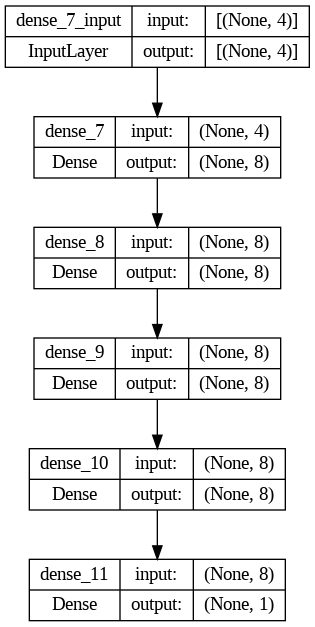

In [ ]:
plot_model(model, show_shapes = True)

###4. 모델 컴파일

In [ ]:
#loss(손실함수 정의), optimizer =(가이드방향 설정)
#metrics = 추가로 훈련중 확인하고 싶은 에러지표
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error", "mean_absolute_error"])

###5. 모델 훈련

In [ ]:
model.fit(x = trainingDataFeatures,
          y= trainingDataLabel,
          batch_size = 32,
          epochs = 1000,
          validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 2s 207ms/step - loss: 1813926.0000 - mean_squared_error: 1813926.0000 - mean_absolute_error: 1129.6940 - val_loss: 2197047.2500 - val_mean_squared_error: 2197047.2500 - val_mean_absolute_error: 1258.6605
Epoch 2/1000
3/3 [==============================] - 0s 37ms/step - loss: 1813789.1250 - mean_squared_error: 1813789.1250 - mean_absolute_error: 1129.6346 - val_loss: 2196887.5000 - val_mean_squared_error: 2196887.5000 - val_mean_absolute_error: 1258.5992
Epoch 3/1000
3/3 [==============================] - 0s 36ms/step - loss: 1813644.0000 - mean_squared_error: 1813644.0000 - mean_absolute_error: 1129.5725 - val_loss: 2196721.2500 - val_mean_squared_error: 2196721.2500 - val_mean_absolute_error: 1258.5360
Epoch 4/1000
3/3 [==============================] - 0s 43ms/step - loss: 1813494.5000 - mean_squared_error: 1813494.5000 - mean_absolute_error: 1129.5085 - val_loss: 2196548.7500 - val_mean_squared_error: 2196548.7500 - val_mean_absol

### 6. 예측

In [ ]:
model.get_weights()

[array([[-0.29024208, -0.6786157 ,  0.85237336,  1.1718514 ,  0.17780802,
          0.630048  ,  0.74826235,  0.18825424],
        [ 0.05240911,  0.45974153,  1.1090767 ,  1.5915745 , -0.18598646,
          1.2690201 ,  0.16107546, -0.6818822 ],
        [-0.6236103 , -0.44181478, -0.22810733,  0.77132475, -0.4305792 ,
          0.37963352, -0.5148626 , -0.5462271 ],
        [-0.6532505 , -0.49718696,  0.69252896,  0.77362835, -0.5606483 ,
          1.1743854 ,  1.2343313 , -0.69131905]], dtype=float32),
 array([ 0.        ,  0.        ,  0.2131725 ,  0.39392805, -0.07819463,
         0.42543405,  0.23262943, -0.06113967], dtype=float32),
 array([[ 0.5069173 , -0.5218939 , -0.36558878, -0.13960394,  0.55374485,
         -0.15572026, -0.4714808 ,  0.5422434 ],
        [ 0.5846475 ,  0.05513608, -0.06266129,  0.2299    , -0.52876776,
          0.24344993, -0.24245447,  0.44102067],
        [ 0.95736676,  0.915786  ,  0.8105414 ,  0.1857084 , -0.07431042,
          1.0681779 ,  0.43164983,

In [ ]:
pwd

'/content'

In [ ]:
model.save("selloutcore.h5")